In [1]:
# !pip install tensorflow keras ann_visualizer graphviz pydot pydotplus

In [2]:
# !pip install visualkeras pillow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import visualkeras
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import platform
import os

# ==================================================================================
# 2. 1D-CNN 모델 설계도
# ==================================================================================
def build_final_model(input_shape):
    model = models.Sequential(name="1D_CNN_SCA_Prediction_Model")
    
    # 입력층
    model.add(layers.Input(shape=input_shape, name="Input_Signal"))
    
    # [특징 추출] Conv1D: 시계열 데이터의 지역적 패턴(파형 특징)을 학습
    model.add(layers.Conv1D(filters=64, kernel_size=8, strides=8, padding='same', name="Conv1D_Feature_Extraction"))
    model.add(layers.BatchNormalization(name="Batch_Normalization")) # 배치 정규화로 학습 안정화
    model.add(layers.ReLU(name="ReLU_Activation")) # 비선형 활성화 함수
    model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling_Downsampling")) # 주요 특징만 남기고 차원 축소
    
    # [분류기] 추출된 특징을 바탕으로 최종 확률 계산
    model.add(layers.Flatten(name="Flatten_Vector")) # 1차원 벡터로 변환
    model.add(layers.Dense(64, name="Dense_Layer")) # 완전 연결층(fully-connected layer)
    model.add(layers.ReLU(name="ReLU_Judgment")) # ReLU 활성화 함수
    model.add(layers.Dropout(0.5, name="Dropout_Overfitting")) # 과적합(Overfitting) 방지
    
    # 출력층
    model.add(layers.Dense(1, name="Output_Node"))
    model.add(layers.Activation('sigmoid', name='Sigmoid'))
    # 이진 분류 (0~1 사이 확률 출력), 0.5 이상 = 급성 심정지 위험
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 모델 생성
model = build_final_model(input_shape=(1024, 1))

model.summary()
print("✅ 모델 생성 완료")

Model: "1D_CNN_SCD_Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_Feature_Extraction   (None, 128, 64)           576       
 (Conv1D)                                                        
                                                                 
 Batch_Normalization (Batch  (None, 128, 64)           256       
 Normalization)                                                  
                                                                 
 ReLU_Activation (ReLU)      (None, 128, 64)           0         
                                                                 
 MaxPooling_Downsampling (M  (None, 64, 64)            0         
 axPooling1D)                                                    
                                                                 
 Flatten_Vector (Flatten)    (None, 4096)              0         
                                       

📊 1. Flowchart 생성 중...


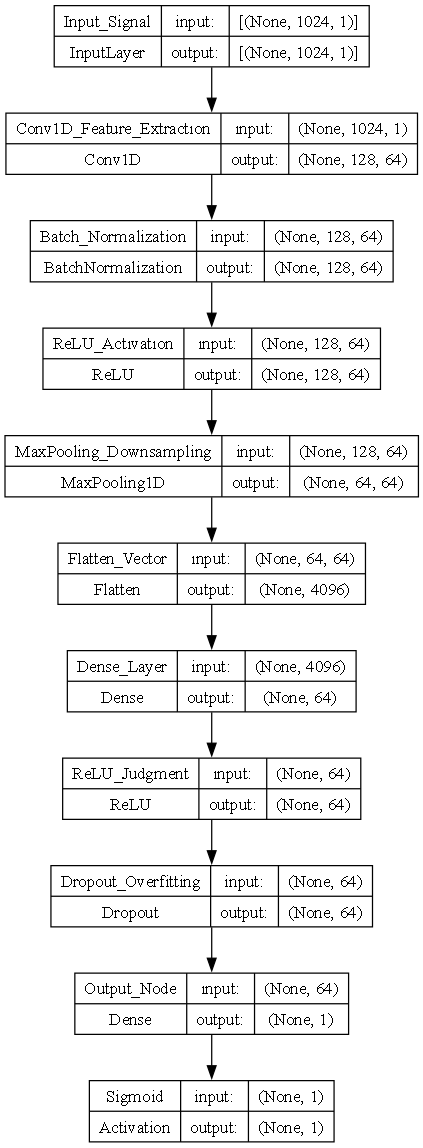

In [2]:
# ========================================================
# 2. [Flowchart] 구조도 생성
# ========================================================
print("📊 1. Flowchart 생성 중...")
plot_model(model, to_file='model_flowchart.png', show_shapes=True, show_layer_names=True, dpi=90)
display(Image.open('model_flowchart.png'))


🎨 2. 3D 시각화 (한글 범례 포함) 생성 중...


c:\Users\asia\anaconda3\envs\SCA_Prediction\lib\site-packages\visualkeras\layered.py:231: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


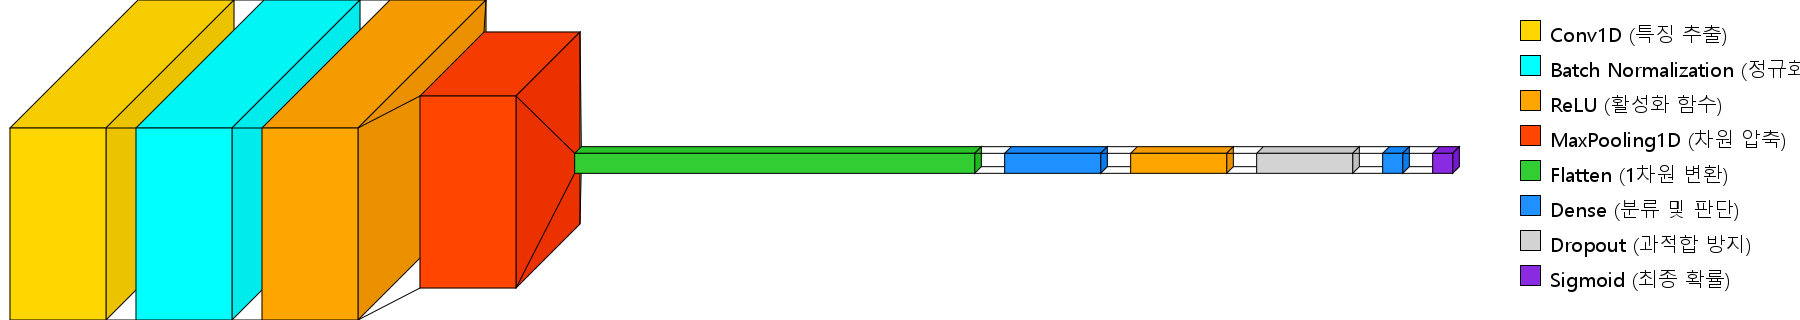

✅ 이미지 저장 완료: model_korean_legend.png


In [3]:
# ========================================================
# 3. [Visualkeras] 3D 시각화 + 범례
# ========================================================
print("\n🎨 2. 3D 시각화 (한글 범례 포함) 생성 중...")

# (1) 색상 설정
color_map = {
    layers.Conv1D: {'fill': '#FFD700'},          # 노랑
    layers.MaxPooling1D: {'fill': '#FF4500'},    # 빨강
    layers.BatchNormalization: {'fill': '#00FFFF'}, # 하늘색
    layers.ReLU: {'fill': '#FFA500'},            # 주황
    layers.Flatten: {'fill': '#32CD32'},         # 초록
    layers.Dense: {'fill': '#1E90FF'},           # 파랑
    layers.Dropout: {'fill': '#D3D3D3'},         # 회색
    layers.Activation: {'fill': '#8A2BE2'}       # 보라
}

# (2) 한글 범례 내용 설정
legend_labels = [
    ("Conv1D (특징 추출)", '#FFD700'),
    ("Batch Normalization (정규화)", '#00FFFF'),
    ("ReLU (활성화 함수)", '#FFA500'),
    ("MaxPooling1D (차원 압축)", '#FF4500'),
    ("Flatten (1차원 변환)", '#32CD32'),
    ("Dense (분류 및 판단)", '#1E90FF'),
    ("Dropout (과적합 방지)", '#D3D3D3'),
    ("Sigmoid (최종 확률)", '#8A2BE2'),
]

# (3) 3D 모델 이미지 생성
model_img = visualkeras.layered_view(
    model, 
    legend=False, 
    draw_volume=True, 
    spacing=30, 
    color_map=color_map, 
    scale_xy=3.0,
    background_fill='white'
)

# (4) 폰트 자동 설정 (운영체제별 한글 폰트 찾기)
def get_korean_font(font_size=20):
    system_name = platform.system()
    font_path = None
    
    if system_name == "Windows":
        font_path = "C:/Windows/Fonts/malgun.ttf" # 맑은 고딕
    elif system_name == "Darwin": # Mac
        font_path = "/System/Library/Fonts/AppleGothic.ttf"
    else: # Linux / Colab
        # Colab 등 리눅스 환경에서는 폰트가 없을 수 있어 기본으로 설정
        # 필요시: !sudo apt-get install fonts-nanum 실행 필요
        possible_paths = [
            "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
            "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf" # 한글 미지원시 대비
        ]
        for p in possible_paths:
            if os.path.exists(p):
                font_path = p
                break
                
    try:
        if font_path and os.path.exists(font_path):
            return ImageFont.truetype(font_path, font_size)
        else:
            return ImageFont.load_default() # 폰트 없으면 기본(한글 깨질 수 있음)
    except:
        return ImageFont.load_default()

# (5) 범례 이미지 생성 함수
def create_legend_image(labels, font):
    padding = 20
    box_size = 20
    line_spacing = 15
    
    # 텍스트 크기 예상 (한글이라 좀 넉넉하게 잡음)
    text_width = 300 
    text_height = len(labels) * (box_size + line_spacing) + padding * 2
    
    legend_img = Image.new('RGB', (text_width, text_height), 'white')
    draw = ImageDraw.Draw(legend_img)
    
    x, y = padding, padding
    
    for text, color in labels:
        # 색상 박스
        draw.rectangle([x, y, x + box_size, y + box_size], fill=color, outline="black")
        # 텍스트
        draw.text((x + box_size + 10, y), text, fill="black", font=font)
        y += box_size + line_spacing
        
    return legend_img

# (6) 이미지 합치기
font = get_korean_font(20)
legend_img = create_legend_image(legend_labels, font)

final_height = max(model_img.height, legend_img.height)
final_width = model_img.width + legend_img.width + 30

final_img = Image.new('RGB', (final_width, final_height), 'white')
final_img.paste(model_img, (0, (final_height - model_img.height) // 2))
final_img.paste(legend_img, (model_img.width + 30, (final_height - legend_img.height) // 2))

# (7) 결과 보여주기 및 저장
display(final_img)
final_img.save("model_korean_legend.png")
print("✅ 이미지 저장 완료: model_korean_legend.png")